In [96]:
%xmode plain
%matplotlib inline

Exception reporting mode: Plain


In [97]:
import pandas as pd
import seaborn as sns
import numpy as np
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [98]:
train = pd.read_csv('train.csv')

In [99]:
HTML ( train.to_html())

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.00,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.00,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.00,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.00,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.00,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.00,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.00,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.00,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.00,1,0,237736,30.0708,NaN,C


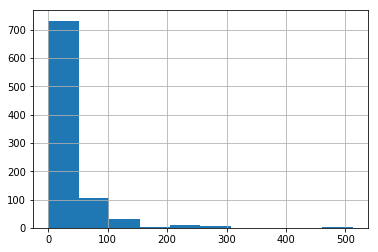

In [100]:
train.Fare.hist()

In [101]:
pd.crosstab(train.Survived, [train.Sex, train.Pclass], rownames=['Survived'], colnames=['Sex', 'Class'])

Sex      female         male         
Class         1   2   3    1   2    3
Survived                             
0             3   6  72   77  91  300
1            91  70  72   45  17   47

In [102]:
train['child'] = np.where(train['Age'] <= 17, 'yes', 'no')
train['elderly'] = np.where(train['Age'] >= 60, 'yes', 'no')

In [103]:
train.sample(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,child,elderly
537,538,1,1,"LeRoy, Miss. Bertha",female,30.00,0,0,PC 17761,106.425,NaN,C,no,no
292,293,0,2,"Levy, Mr. Rene Jacques",male,36.00,0,0,SC/Paris 2163,12.875,D,C,no,no
78,79,1,2,"Caldwell, Master. Alden Gates",male,0.83,0,2,248738,29.000,NaN,S,yes,no
416,417,1,2,"Drew, Mrs. James Vivian (Lulu Thorne Christian)",female,34.00,1,1,28220,32.500,NaN,S,no,no
695,696,0,2,"Chapman, Mr. Charles Henry",male,52.00,0,0,248731,13.500,NaN,S,no,no
399,400,1,2,"Trout, Mrs. William H (Jessie L)",female,28.00,0,0,240929,12.650,NaN,S,no,no
320,321,0,3,"Dennis, Mr. Samuel",male,22.00,0,0,A/5 21172,7.250,NaN,S,no,no
784,785,0,3,"Ali, Mr. William",male,25.00,0,0,SOTON/O.Q. 3101312,7.050,NaN,S,no,no
304,305,0,3,"Williams, Mr. Howard Hugh ""Harry""",male,NaN,0,0,A/5 2466,8.050,NaN,S,no,no
47,48,1,3,"O'Driscoll, Miss. Bridget",female,NaN,0,0,14311,7.750,NaN,Q,no,no


In [104]:
def one_hot(df, cols):
    """
    @param df pandas DataFrame
    @param cols a list of columns to encode 
    @return a DataFrame with one-hot encoding
    """
    for each in cols:
        dummies = pd.get_dummies(df[each], prefix=each, drop_first=False)
        df = pd.concat([df, dummies], axis=1)
    return df

In [105]:
train2 = one_hot(train, ['Pclass'])

In [106]:
train2.sample(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,child,elderly,Pclass_1,Pclass_2,Pclass_3
417,418,1,2,"Silven, Miss. Lyyli Karoliina",female,18.0,0,2,250652,13.00,NaN,S,no,no,0,1,0
180,181,0,3,"Sage, Miss. Constance Gladys",female,NaN,8,2,CA. 2343,69.55,NaN,S,no,no,0,0,1
558,559,1,1,"Taussig, Mrs. Emil (Tillie Mandelbaum)",female,39.0,1,1,110413,79.65,E67,S,no,no,1,0,0


In [107]:
train2.Embarked.unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [108]:
train3 = one_hot(train2, ['Embarked'])

In [109]:
train3.sample()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,child,elderly,Pclass_1,Pclass_2,Pclass_3,Embarked_C,Embarked_Q,Embarked_S
661,662,0,3,"Badt, Mr. Mohamed",male,40.0,0,0,2623,7.225,NaN,C,no,no,0,0,1,1,0,0


In [110]:
def namelength(name):
    return len(name)

In [111]:
namelength('bubba')

5

In [112]:
train3['NameLength'] = train3.Name.apply(namelength)

In [113]:
train3.sample(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,Embarked,child,elderly,Pclass_1,Pclass_2,Pclass_3,Embarked_C,Embarked_Q,Embarked_S,NameLength
710,711,1,1,"Mayne, Mlle. Berthe Antonine (""Mrs de Villiers"")",female,24.0,0,0,PC 17482,49.5042,...,C,no,no,1,0,0,1,0,0,48
495,496,0,3,"Yousseff, Mr. Gerious",male,NaN,0,0,2627,14.4583,...,C,no,no,0,0,1,1,0,0,21
717,718,1,2,"Troutt, Miss. Edwina Celia ""Winnie""",female,27.0,0,0,34218,10.5000,...,S,no,no,0,1,0,0,0,1,35


In [114]:
pct_ages_null = train3.Age.isnull().sum() / len(train3)

In [115]:
round(pct_ages_null, 3)

0.199

In [116]:
train3.Ticket.unique()

array(['A/5 21171', 'PC 17599', 'STON/O2. 3101282', '113803', '373450',
       '330877', '17463', '349909', '347742', '237736', 'PP 9549',
       '113783', 'A/5. 2151', '347082', '350406', '248706', '382652',
       '244373', '345763', '2649', '239865', '248698', '330923', '113788',
       '347077', '2631', '19950', '330959', '349216', 'PC 17601',
       'PC 17569', '335677', 'C.A. 24579', 'PC 17604', '113789', '2677',
       'A./5. 2152', '345764', '2651', '7546', '11668', '349253',
       'SC/Paris 2123', '330958', 'S.C./A.4. 23567', '370371', '14311',
       '2662', '349237', '3101295', 'A/4. 39886', 'PC 17572', '2926',
       '113509', '19947', 'C.A. 31026', '2697', 'C.A. 34651', 'CA 2144',
       '2669', '113572', '36973', '347088', 'PC 17605', '2661',
       'C.A. 29395', 'S.P. 3464', '3101281', '315151', 'C.A. 33111',
       'S.O.C. 14879', '2680', '1601', '348123', '349208', '374746',
       '248738', '364516', '345767', '345779', '330932', '113059',
       'SO/C 14885', '31012

In [117]:
train4 = one_hot(train3, ['Sex'])

In [118]:
train4.sample(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,elderly,Pclass_1,Pclass_2,Pclass_3,Embarked_C,Embarked_Q,Embarked_S,NameLength,Sex_female,Sex_male
858,859,1,3,"Baclini, Mrs. Solomon (Latifa Qurban)",female,24.0,0,3,2666,19.2583,...,no,0,0,1,1,0,0,37,1,0
665,666,0,2,"Hickman, Mr. Lewis",male,32.0,2,0,S.O.C. 14879,73.5000,...,no,0,1,0,0,0,1,18,0,1
489,490,1,3,"Coutts, Master. Eden Leslie ""Neville""",male,9.0,1,1,C.A. 37671,15.9000,...,no,0,0,1,0,0,1,37,0,1


In [119]:
train5 = one_hot(train4, ['elderly'])

In [120]:
train6 = one_hot(train5, ['child'])

In [121]:
train6["Age"].fillna(train6.groupby("Sex")["Age"].transform("mean"), inplace=True)
train6.sample(4)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,Embarked_C,Embarked_Q,Embarked_S,NameLength,Sex_female,Sex_male,elderly_no,elderly_yes,child_no,child_yes
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.05,...,0,0,1,24,0,1,1,0,1,0
857,858,1,1,"Daly, Mr. Peter Denis",male,51.0,0,0,113055,26.55,...,0,0,1,22,0,1,1,0,1,0
854,855,0,2,"Carter, Mrs. Ernest Courtenay (Lilian Hughes)",female,44.0,1,0,244252,26.00,...,0,0,1,45,1,0,1,0,1,0
263,264,0,1,"Harrison, Mr. William",male,40.0,0,0,112059,0.00,...,0,0,1,21,0,1,1,0,1,0


In [122]:
train6.Name.unique()

array(['Braund, Mr. Owen Harris',
       'Cumings, Mrs. John Bradley (Florence Briggs Thayer)',
       'Heikkinen, Miss. Laina',
       'Futrelle, Mrs. Jacques Heath (Lily May Peel)',
       'Allen, Mr. William Henry', 'Moran, Mr. James',
       'McCarthy, Mr. Timothy J', 'Palsson, Master. Gosta Leonard',
       'Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)',
       'Nasser, Mrs. Nicholas (Adele Achem)',
       'Sandstrom, Miss. Marguerite Rut', 'Bonnell, Miss. Elizabeth',
       'Saundercock, Mr. William Henry', 'Andersson, Mr. Anders Johan',
       'Vestrom, Miss. Hulda Amanda Adolfina',
       'Hewlett, Mrs. (Mary D Kingcome) ', 'Rice, Master. Eugene',
       'Williams, Mr. Charles Eugene',
       'Vander Planke, Mrs. Julius (Emelia Maria Vandemoortele)',
       'Masselmani, Mrs. Fatima', 'Fynney, Mr. Joseph J',
       'Beesley, Mr. Lawrence', 'McGowan, Miss. Anna "Annie"',
       'Sloper, Mr. William Thompson', 'Palsson, Miss. Torborg Danira',
       'Asplund, Mrs. Carl Oscar 

In [125]:
train6.drop(['Sex'], axis=1, inplace=True)

In [126]:
list(train6)

['PassengerId',
 'Survived',
 'Pclass',
 'Name',
 'Age',
 'SibSp',
 'Parch',
 'Ticket',
 'Fare',
 'Cabin',
 'Embarked',
 'child',
 'elderly',
 'Pclass_1',
 'Pclass_2',
 'Pclass_3',
 'Embarked_C',
 'Embarked_Q',
 'Embarked_S',
 'NameLength',
 'Sex_female',
 'Sex_male',
 'elderly_no',
 'elderly_yes',
 'child_no',
 'child_yes']

In [129]:
train6.Age = train6.Age.astype(int)

In [131]:
train6.drop('Ticket', axis=1, inplace = True)

In [132]:
train6.drop('Name', axis=1, inplace=True)

In [133]:
train6.sample(5)

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Cabin,Embarked,child,...,Embarked_C,Embarked_Q,Embarked_S,NameLength,Sex_female,Sex_male,elderly_no,elderly_yes,child_no,child_yes
34,35,0,1,28,1,0,82.1708,NaN,C,no,...,1,0,0,23,0,1,1,0,1,0
224,225,1,1,38,1,0,90.0000,C93,S,no,...,0,0,1,28,0,1,1,0,1,0
652,653,0,3,21,0,0,8.4333,NaN,S,no,...,0,0,1,30,0,1,1,0,1,0
1,2,1,1,38,1,0,71.2833,C85,C,no,...,1,0,0,51,1,0,1,0,1,0
263,264,0,1,40,0,0,0.0000,B94,S,no,...,0,0,1,21,0,1,1,0,1,0


In [134]:
train6.Cabin.unique()


array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64',

In [135]:
pct_cabin_null = train6.Cabin.isnull().sum() / len(train6)

In [136]:
round(pct_cabin_null, 3)

0.771

In [137]:
train6.drop('Cabin', axis=1, inplace=True)

In [138]:
train6.sample(3)

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Embarked,child,elderly,...,Embarked_C,Embarked_Q,Embarked_S,NameLength,Sex_female,Sex_male,elderly_no,elderly_yes,child_no,child_yes
311,312,1,1,18,2,2,262.3750,C,no,no,...,1,0,0,26,1,0,1,0,1,0
691,692,1,3,4,0,1,13.4167,C,yes,no,...,1,0,0,18,1,0,1,0,0,1
400,401,1,3,39,0,0,7.9250,S,no,no,...,0,0,1,18,0,1,1,0,1,0


In [139]:
train6.drop('PassengerId', axis=1, inplace=True)


In [140]:
train6.drop('Embarked', axis=1, inplace=True)

In [141]:
train6.sample(3)

,Survived,Pclass,Age,SibSp,Parch,Fare,child,elderly,Pclass_1,Pclass_2,...,Embarked_C,Embarked_Q,Embarked_S,NameLength,Sex_female,Sex_male,elderly_no,elderly_yes,child_no,child_yes
567,0,3,29,0,4,21.0750,no,no,0,0,...,0,0,1,43,1,0,1,0,1,0
743,0,3,24,1,0,16.1000,no,no,0,0,...,0,0,1,17,0,1,1,0,1,0
96,0,1,71,0,0,34.6542,no,yes,1,0,...,1,0,0,25,0,1,0,1,1,0


In [142]:
train6.Fare = train6.Fare.astype(int)
train6.Age = train6.Age.astype(int)

In [143]:
train6.sample(3)

,Survived,Pclass,Age,SibSp,Parch,Fare,child,elderly,Pclass_1,Pclass_2,...,Embarked_C,Embarked_Q,Embarked_S,NameLength,Sex_female,Sex_male,elderly_no,elderly_yes,child_no,child_yes
796,1,1,49,0,0,25,no,no,1,0,...,0,0,1,27,1,0,1,0,1,0
46,0,3,30,1,0,15,no,no,0,0,...,0,1,0,17,0,1,1,0,1,0
158,0,3,30,0,0,8,no,no,0,0,...,0,0,1,19,0,1,1,0,1,0


In [144]:
train6.drop('child', axis=1, inplace=True)

In [145]:
train6.drop('elderly', axis=1, inplace=True)

In [146]:
train6.sample(3)

,Survived,Pclass,Age,SibSp,Parch,Fare,Pclass_1,Pclass_2,Pclass_3,Embarked_C,Embarked_Q,Embarked_S,NameLength,Sex_female,Sex_male,elderly_no,elderly_yes,child_no,child_yes
193,1,2,3,1,1,26,0,1,0,0,0,1,26,0,1,1,0,0,1
23,1,1,28,0,0,35,1,0,0,0,0,1,28,0,1,1,0,1,0
691,1,3,4,0,1,13,0,0,1,1,0,0,18,1,0,1,0,0,1


### Question: Do Orphans Have Much Chance?
Let's define orphans as "Under 17 with No Parents, Spouse, Or Siblings Aboard.

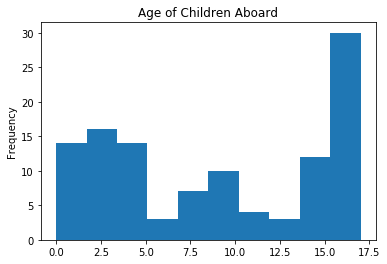

In [168]:
train6.Age[train6.child_yes == 1].plot(kind="hist", title = "Age of Children Aboard")

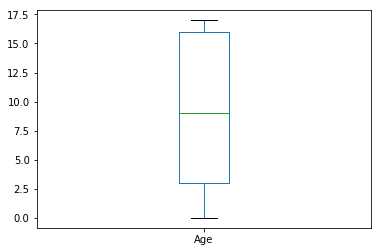

In [172]:
train6.Age[train6.child_yes == 1].plot.box()